In [297]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [298]:
df = pd.read_csv('TrainDF.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [299]:
df = df.iloc[::-1].reset_index(drop=True)

df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2012-01-04,14050,14050,13700,13720,559100,7719804000
1,2012-01-05,13720,13840,13600,13800,511500,7030811000
2,2012-01-06,13990,14030,13790,13850,765500,10635609000
3,2012-01-10,13890,14390,13860,14390,952300,13533413000
4,2012-01-11,14360,14750,14280,14590,1043400,15191988000


In [300]:
print(np.shape(df), '\n')
df.isnull().sum()

(1226, 7) 



Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [301]:
zero = df[df['Volume'] == 0]
print(len(zero))

0


([<matplotlib.axis.XTick at 0x7fba2c9eceb8>,
 [Text(0, 0, '2012-01-04'),
  Text(0, 0, '2014-07-01'),
  Text(0, 0, '2016-12-30')])

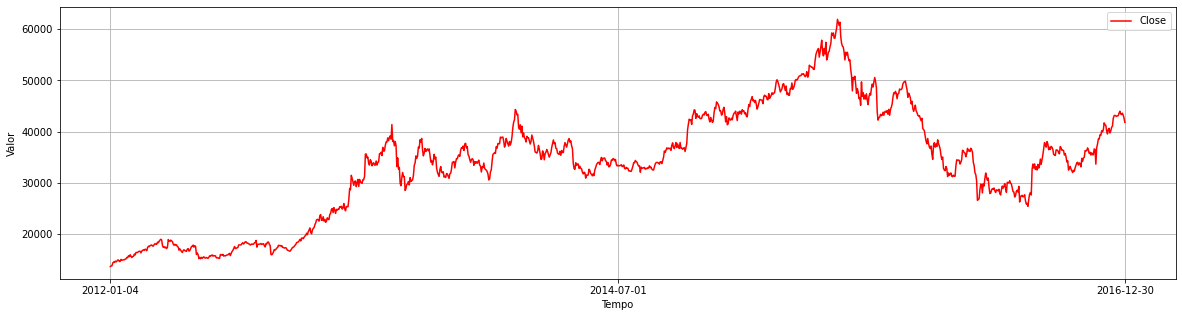

In [302]:
plt.figure(figsize=  (20,5))
plt.plot(df['Date'], df['Close'], color = 'red', label = 'Close')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.xticks(ticks = [df['Date'][0], df['Date'][len(df) // 2], df['Date'][len(df) - 1]],
           labels = [df['Date'][0], df['Date'][len(df) // 2], df['Date'][len(df) - 1]])


In [312]:
train = df[:-200]
test = df[-200:]

xtrain = train['Close'].values
xtrain = np.reshape(xtrain, (-1,1))
xtrain = sc.fit_transform(xtrain)

xdate = train['Date']
xtest = test['Close'].values
xdate = test['Date'] #Tem 2 xdate, mudar!

In [313]:
STEP = 80

x1 = []
y1 = []

for i in range(STEP, len(xtrain)):
  x1.append(xtrain[i - STEP: i])
  y1.append(xtrain[i])

x1, y1 = np.array(x1), np.array(y1)
x1 = x1.reshape((x1.shape[0], x1.shape[1], 1))

In [ ]:
from keras.layers import Dense, LSTM, Dropout, Input
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.models import Model

reduce_lr = ReduceLROnPlateau(monitor = 'loss', patience = 1, factor = 0.1, mode = 'min')
checkpoint = ModelCheckpoint('lstm.h5', save_best_only= True)
CB = [reduce_lr, checkpoint]

def RNN_model():
  input_1 = Input(shape = (x1.shape[1], 1))
  x = LSTM(units = 70, return_sequences=True)(input_1)
  x = Dropout(0.3)(x)
  x = LSTM(units = 70, return_sequences= True)(x)
  x = Dropout(0.3)(x)
  x = LSTM(units = 70, return_sequences= True)()
  x = Dropout(0.3)(x)
  x = LSTM(units = 70, return_sequences= False)(x)
  x = Dropout(0.3)(x)
  y = Dense(units = 1)(x)

  model = Model(inputs = input_1, output = y)
  return model


model = RNN_model()
model.summary()

In [315]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit = model.fit(x1, y1, epochs = 100, callbacks = CB)

Epoch 1/100
946/946 [==============================] - 8s 9ms/step - loss: 0.0401
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


946/946 [==============================] - 7s 7ms/step - loss: 0.0078
Epoch 3/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0067
Epoch 4/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0059
Epoch 5/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0058
Epoch 6/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0052
Epoch 7/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0055
Epoch 8/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0054
Epoch 9/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0054
Epoch 10/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0056
Epoch 11/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0052
Epoch 12/100
946/946 [==============================] - 7s 7ms/step - loss: 0.0053
Epoch 13/100
946/946 [==============================] - 7s 8ms/step - loss: 0.0051
Epoch 14/100
946/946 [==

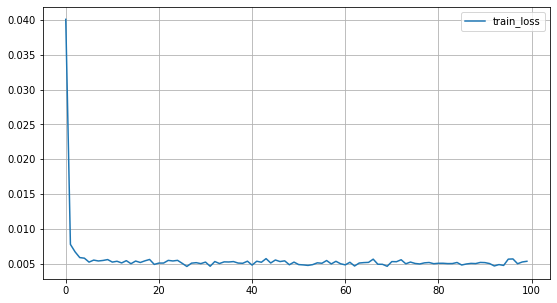

In [409]:
plt.figure(0, figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(fit.history['loss'], label = 'train_loss')
plt.legend()
plt.grid(True)

In [410]:
#Train
train_inputs = df['Close'][0: len(xtrain)].values
train_inputs = train_inputs.reshape((-1,1))
train_inputs = sc.transform(train_inputs)
j = []
for i in range(STEP, len(xtrain)):
  j.append(train_inputs[i-STEP: i])

j = np.array(j)
j = j.reshape(j.shape[0], j.shape[1], 1)

#Test
inputs =  df['Close'][len(df)-  len(xtest) - STEP: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
k = []

for i in range(STEP, STEP + len(xtest)):
  k.append(inputs[i-STEP: i])
k = np.array(k)
k = k.reshape((k.shape[0], k.shape[1], 1))

In [411]:
pred_test = model.predict(k)
inv_test = sc.inverse_transform(pred_test)

pred_train = model.predict(j)
inv_train = sc.inverse_transform(pred_train)

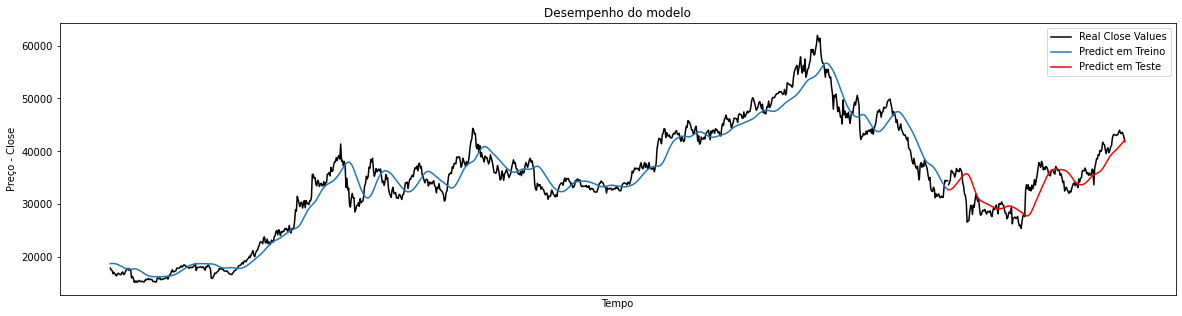

In [463]:
plt.figure(figsize = (20,5))
plt.title('Desempenho do modelo')

plt.plot(train['Date'][STEP: len(train)], train['Close'][STEP: len(train)], color = 'black', label = 'Real Close Values')
plt.plot(test['Date'], test['Close'], color = 'black')
plt.plot(train['Date'][STEP : len(train)], inv_train, label = 'Predict em Treino')
plt.plot(test['Date'], inv_test, color = 'red', label = 'Predict em Teste')

plt.xlabel('Tempo')
plt.ylabel('Preço - Close')
plt.xticks(ticks = [], labels = [])
plt.legend()

In [465]:
from sklearn.metrics import mean_squared_error

full_pred = np.concatenate((inv_train, inv_test), axis = 0)
rmse = mean_squared_error(df['Close'][STEP: ].values, full_pred)
mean = np.mean(df['Close'].values)

print(f'RMSE: {math.sqrt(rmse)/ mean}')

RMSE: 0.075923765925136
